<a href="https://colab.research.google.com/github/ekyaaa/machine-learning-semester5-2025/blob/main/kuiz/Kuiz1_2341720111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [311]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [312]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [313]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [314]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head(500)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41,Private,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
496,20,Private,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
497,23,Private,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K
498,26,Private,64293,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [315]:
# Data Size
df.shape

(48842, 15)

In [316]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [317]:
# Jawab Soal 1
missing_values = df.isna().sum()
print(missing_values)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [318]:
# Jawab Soal 2
# Kolom diambil dari mana saja kolom yang memiliki nilai kosong
cols_missing = ['workclass', 'occupation', 'native-country']
# Mengisi dengan modus
for col in cols_missing:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Cek seperti soal 1
missing_values_after = df.isna().sum()
print(missing_values_after)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [319]:
# Jawab Soal 2
# a. Setelah mengerjakan bagian 2 nomor 1.2 terdapat anomali 50k dengan titik dan tidak.
print('a. income before')
print(df['income'].unique())

# Untuk menghilangkan titik diakhir
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
print('a. income after')
print(df['income'].unique())

a. income before
['<=50K' '>50K' '<=50K.' '>50K.']
a. income after
['<=50K' '>50K']


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

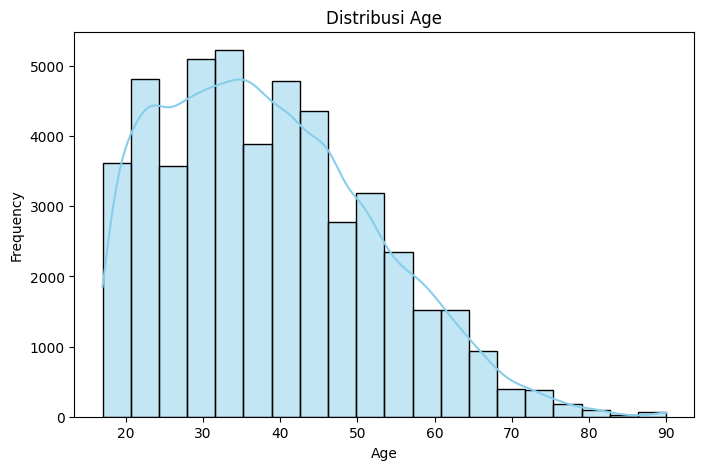

In [320]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-3821751812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')


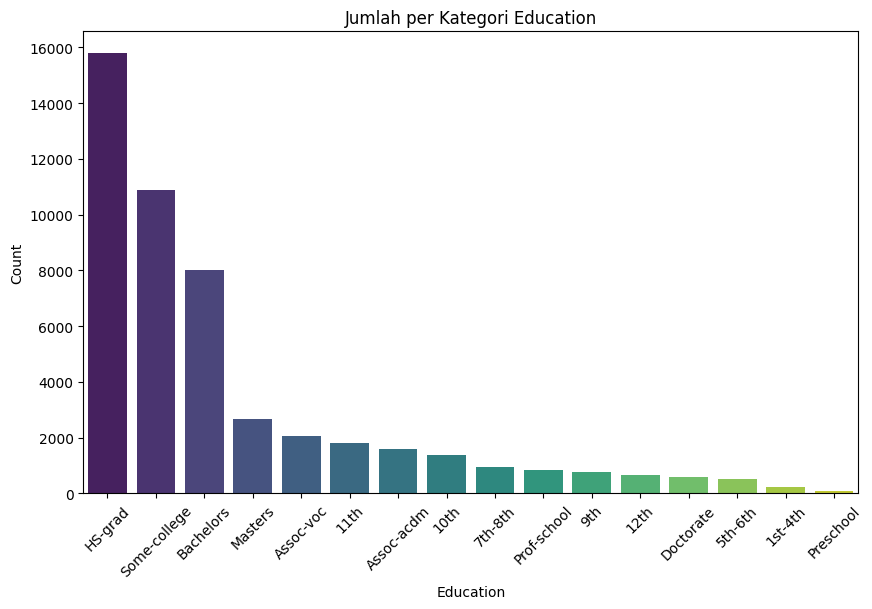

In [321]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')
plt.title('Jumlah per Kategori Education')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1146249265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='hours-per-week', palette='pastel')


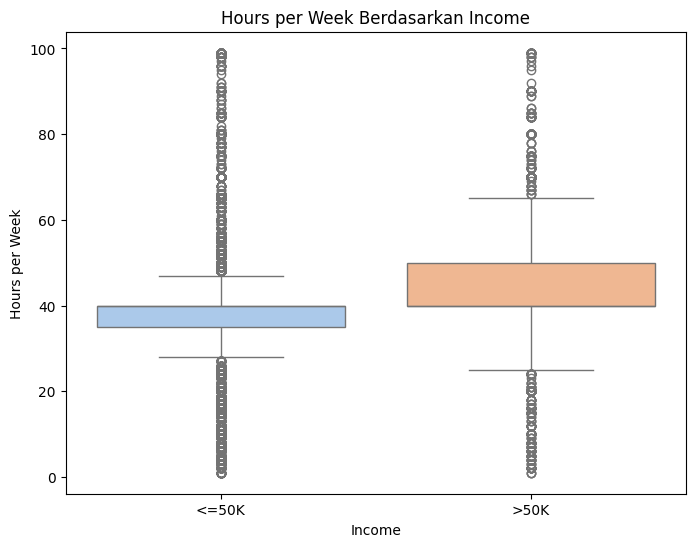

In [322]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='income', y='hours-per-week', palette='pastel')
plt.title('Hours per Week Berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

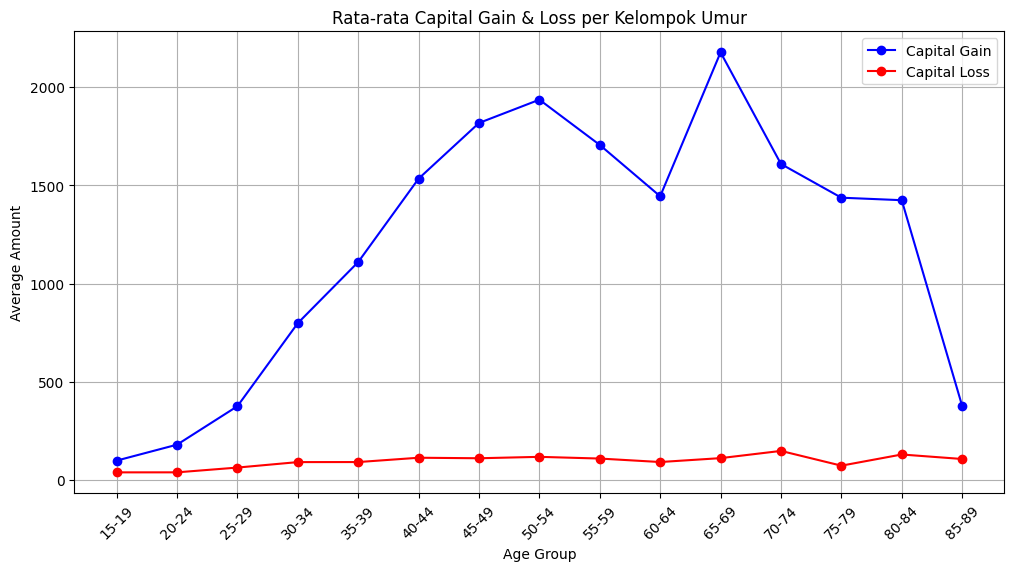

In [323]:
# Jawab 1.4 - Lineplot
# Karena nilai dari capital-gain dan capital-loss banyak yang 0, saya memutuskan untuk mengelompokkan berdasarkan kelompok umur

# Membagi per 5 dari rentang umur 15 hingga 91
age_bins = range(15, 91, 5)
age_labels = [f"{i}-{i+4}" for i in age_bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Hitung rata-rata capital-gain dan capital-loss per age_group
grouped = df.groupby('age_group', observed=False)[['capital-gain', 'capital-loss']].mean().reset_index()

# Plot lineplot
plt.figure(figsize=(12,6))
plt.plot(grouped['age_group'], grouped['capital-gain'], marker='o', label='Capital Gain', color='blue')
plt.plot(grouped['age_group'], grouped['capital-loss'], marker='o', label='Capital Loss', color='red')
plt.xticks(rotation=45)
plt.title('Rata-rata Capital Gain & Loss per Kelompok Umur')
plt.xlabel('Age Group')
plt.ylabel('Average Amount')
plt.legend()
plt.grid(True)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [324]:
# Jawab dengan komentar python

'''
  1. Fenomena aneh terjadi jika langsung diplotkan antara umur dengan capital gain karena banyak yang kosong dan jumlahnya sangat bervariasi
  , sehingga opsi terbaik adalah menggabungkan menjadi kelompok dan merata-ratakan capital loss/gainnya.
'''

'''
  2. Pertama adalah saya akan membuat kelompok terhadap edukasi terakhir dan status menikah yang sama
  lalu saya akan memberikan nilai rata-rata dari age kelompok itu terhadap age yang kosong didalam kelompok itu

  Saya terapkan hal ini karena status pernikahan dan pendidikan terakhir adalah variabel berpengaruh besar dalam
  menentukan umur seseorang.
'''

'''
  3. Outlier berdasarkan kategori income:
    <=50K    11706
    >50K       781

    Yang terbanyak adalah <=50K
'''

'\n  2. Pertama adalah saya akan membuat kelompok terhadap edukasi terakhir dan status menikah yang sama \n  lalu saya akan memberikan nilai rata-rata dari age kelompok itu terhadap age yang kosong didalam kelompok itu\n\n  Saya terapkan hal ini karena status pernikahan dan pendidikan terakhir adalah variabel berpengaruh besar dalam\n  menentukan umur seseorang. \n\n  3. Outlier berdasarkan kategori income:\n    <=50K    11706\n    >50K       781\n\n    Yang terbanyak adalah <=50K\n'

In [325]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Hitung outlier per kategori income
outliers_per_income = df.groupby('income')['hours-per-week'].apply(count_outliers)
print(outliers_per_income)

# Kategori dengan jumlah outlier terbanyak
max_outlier_category = outliers_per_income.idxmax()
print(f"\nKategori dengan outlier terbanyak: {max_outlier_category}")

income
<=50K    11706
>50K       781
Name: hours-per-week, dtype: int64

Kategori dengan outlier terbanyak: <=50K


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [326]:
# Jawab Soal 1
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
# Penentuan 0, , .... ditentukan berdasarkan alfabet
le = LabelEncoder()

# Encoding kolom Sex (feature)
df['sex'] = le.fit_transform(df['sex'])

# Encoding kolom Income (target)
df['income'] = le.fit_transform(df['income'])

# Pisahkan fitur X dan target y
X = df.drop('income', axis=1)
y = df['income']

# Cek hasil encoding
print(df[['sex', 'income']].head())

   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [327]:
# Jawab Soal 1
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()
print(corr)

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


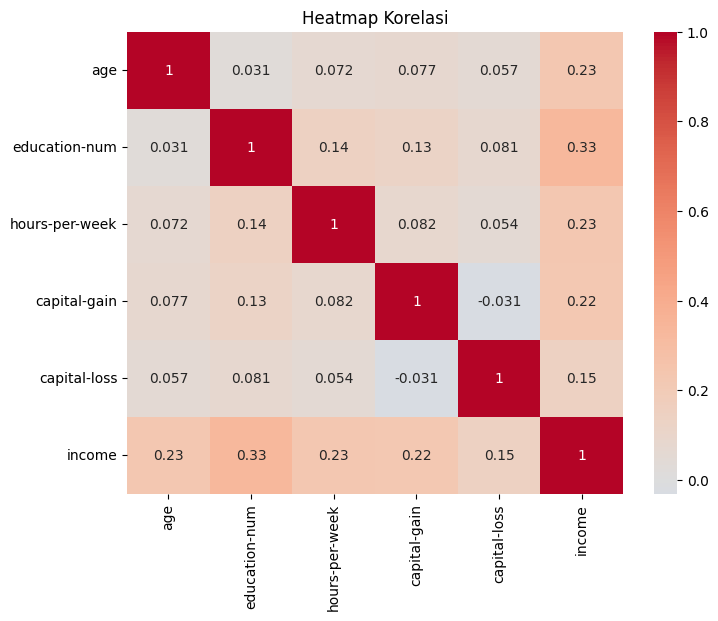

In [328]:
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi")
plt.show()

In [329]:
# Hasil analisis jelaskan pada cell ini
'''
  Dapat dilihat bahwa semakin tinggi umur, semakin tinggi pula income dan pendidikannya.

'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [330]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


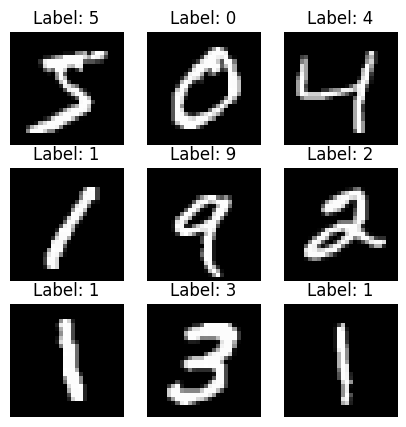

In [331]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Train shape (upsampled): (60000, 32, 32)
Test shape (upsampled): (10000, 32, 32)


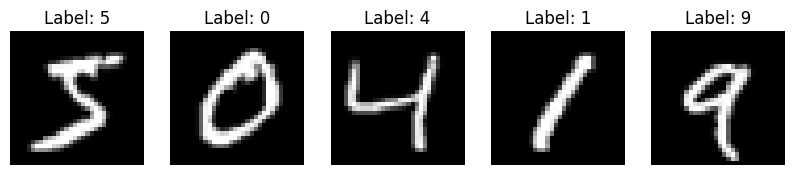

In [332]:
# Jawab Soal 1
X_train_up = np.zeros((X_train.shape[0], 32, 32), dtype=np.uint8)
X_test_up  = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# Resize ke 32x32
for i in range(X_train.shape[0]):
    X_train_up[i] = cv2.resize(X_train[i], (32, 32), interpolation=cv2.INTER_CUBIC)

for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Train shape (upsampled):", X_train_up.shape)
print("Test shape (upsampled):", X_test_up.shape)

# Tampilkan 5 data hasil upsampling
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Train min-max: 0.0 - 1.0
Test min-max: 0.0 - 1.0


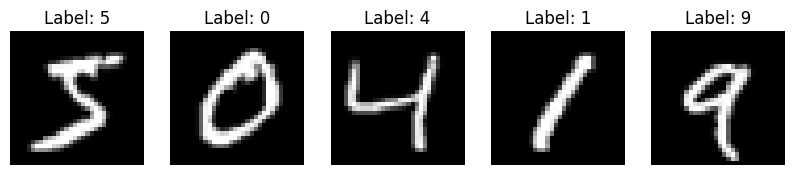

In [333]:
# Jawab Soal 2
# Normalisasi ke rentang 0-1
X_train_up = X_train_up.astype("float32") / 255.0
X_test_up  = X_test_up.astype("float32") / 255.0

print("Train min-max:", X_train_up.min(), "-", X_train_up.max())
print("Test min-max:", X_test_up.min(), "-", X_test_up.max())

# Cek hasil normalisasi pada 5 data
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [334]:
# Jawab Soal 3
# Buat holder array kosong ukuran 32*32 (1024)
X_test_flat = np.zeros((X_test_up.shape[0], 32*32), dtype=np.float32)

# Flatten tiap gambar 32x32 menjadi 1 row array berjumlah 32*32 (yaitu 1024)
for i in range(X_test_up.shape[0]):
    X_test_flat[i] = X_test_up[i].reshape(-1)   # atau .flatten()

print("Shape sebelum flatten:", X_test_up.shape)
print("Shape sesudah flatten:", X_test_flat.shape)

# Cek contoh 1 data
print("Contoh array data 1 (10 nilai pertama):", X_test_flat[0][:10])


Shape sebelum flatten: (10000, 32, 32)
Shape sesudah flatten: (10000, 1024)
Contoh array data 1 (10 nilai pertama): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
